In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython import display

In [2]:
from settings.types import Env, Model, H, Enc
from src.model_spinboson import SSpinBosonSimulation, DSpinBosonSimulation
from src.model_twolevel import TwoLvlSimulation
from src.model_jc import JCSimulation
import src.plot_simulations as plotting
import src.plot_illustrations as illustrations

ModuleNotFoundError: No module named 'src.model_js'

In [ ]:
# set up matplotlib
%matplotlib inline 
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [ ]:
# setup plot styling
from settings.plot_styles import set_plot_style
set_plot_style()

# Paper

Here you find the code used to generate the figures in the paper <\br>
'Digital Quantum Simulation of the Spin-Boson Model under Markovian Open-System Dynamics'

https://doi.org/10.3390/e24121766

### Fig 2, 3: Circuit implementation of the dissipation

In [ ]:

adc_dir, adc_ltx, adc = illustrations.circuit_adc()
print(adc)

d_dir, d_ltx, d = illustrations.circuit_dissipation()
print(d)

    Ry($\theta$) ┌───┐     
s: ──────■───────┤ X ├─────
     ┌───┴───┐   └─┬─┘     
a: ──┤ Ry(π) ├─────■───|0>─
     └───────┘             
   ┌────┐     
s: ┤0   ├─────
   │  D │     
a: ┤1   ├─|0>─
   └────┘     


### Fig 3: Circuit schematic

In [ ]:
sb1s_dir, sb1s_ltx, sb1s = illustrations.circuit_sb1s()
print(sb1s)

sb2s_dir, sb2s_ltx, sb2s = illustrations.circuit_sb2s()
print(sb2s)

           ░ ┌────┐      ┌────┐      ┌────┐       ░ ┌───┐
b_0: ──────░─┤0   ├──────┤0   ├──────┤0   ├───────░─┤ M ├
           ░ │    │      │    │      │    │       ░ ├───┤
b_1: ──────░─┤1 U ├──────┤1 U ├──────┤1 U ├───────░─┤ M ├
     ┌───┐ ░ │    │┌────┐│    │┌────┐│    │┌────┐ ░ ├───┤
  s: ┤ X ├─░─┤2   ├┤0   ├┤2   ├┤0   ├┤2   ├┤0   ├─░─┤ M ├
     └───┘ ░ └────┘│  D │└────┘│  D │└────┘│  D │ ░ └───┘
  a: ──────░───────┤1   ├─|0>──┤1   ├─|0>──┤1   ├─░──────
           ░       └────┘      └────┘      └────┘ ░      
                   ┌────┐      ┌────┐      ┌────┐        
 a1: ──────────────┤0   ├─|0>──┤0   ├─|0>──┤0   ├────────
     ┌───┐ ░ ┌────┐│  D │┌────┐│  D │┌────┐│  D │ ░ ┌───┐
 s1: ┤ X ├─░─┤0   ├┤1   ├┤0   ├┤1   ├┤0   ├┤1   ├─░─┤ M ├
     └───┘ ░ │    │└────┘│    │└────┘│    │└────┘ ░ ├───┤
b_0: ──────░─┤1   ├──────┤1   ├──────┤1   ├───────░─┤ M ├
           ░ │  U │      │  U │      │  U │       ░ ├───┤
b_1: ──────░─┤2   ├──────┤2   ├──────┤2   ├───────░─┤ M ├
           ░ │

### Fig 4: Hamiltonian w/o open system simulation, single-spin Spin-Boson model

KeyboardInterrupt: 

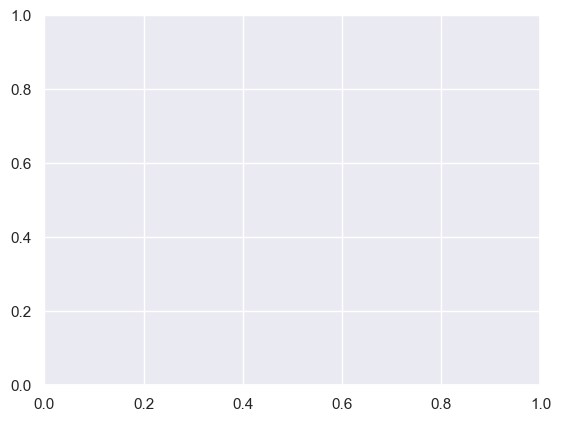

In [ ]:
fig, legend = plotting.plot_ifid_vs_dt_env()
# display.Image(fig)
# display.Image(legend)

### Fig 5: Optimal time step for the Trotter-Suzuki decomposition

In [ ]:
fig, legend = plotting.plot_ifid_vs_dt_noises()
# display.Image(fig)
# display.Image(legend)

In [ ]:
fig, legend = plotting.plot_ifid_vs_noise()
# display.Image(fig)
# display.Image(legend)

### Fig 6: Infidelity over time

In [ ]:
fig, legend = plotting.plot_ifid_vs_time()
# display.Image(fig)
# display.Image(legend)

### Fig 7: Effect of the dissipative rate on the infidelity

In [ ]:
fig, legend = plotting.plot_ifid_vs_gamma()
# display.Image(fig)
# display.Image(legend)

In [ ]:
fig, legend = plotting.plot_ifid_vs_time_gammas()
# display.Image(fig)
# display.Image(legend)

### Fig 8: Single-spin observables

In [ ]:
fig, legend = plotting.plot_bosons(bosons=[4])
# display.Image(fig)
# display.Image(legend)

In [ ]:
fig, legend = plotting.plot_spin()
# display.Image(fig)
# display.Image(legend)

### Fig 9: Two spin observables

In [ ]:
fig, legend = plotting.plot_spincorrelation()
# display.Image(fig)
# display.Image(legend)

### Fig A1: Qubit connectivity

In [ ]:
from qiskit.visualization import plot_gate_map, plot_circuit_layout
from qiskit.providers.fake_provider import FakeJakarta, FakeToronto
from qiskit.providers.aer import AerSimulator
plot_gate_map(backend=FakeJakarta())

### Tab A1: Number of gates

In [ ]:
for h in [H.FRSTORD, H.SCNDORD, H.ISODECOMP]:
    for sim in [SSpinBosonSimulation(h=h), DSpinBosonSimulation(h=h)]:
        depth, gates, n_single, n_cx = sim.get_gates(sim.backend, initial=True)
        print(f'One Trotter step of {sim.model.value}, {sim.h.value} requires {n_single} single-qubit- and {n_cx} CX-Gates.')


### Fig A2: ADC circuit transpiled onto IBM Jakarta gateset

In [ ]:
sim = TwoLvlSimulation(env=Env.ADC)
qc = sim.circuit_example(AerSimulator(), initial=False)
print(qc)

### Ommited: Circuit for one trotter step transpiled onto IBM Jakarta gateset

In [ ]:
sim = SSpinBosonSimulation()
qc = sim.circuit_example(AerSimulator(), initial=False)
print(qc)

In [ ]:
sim = DSpinBosonSimulation()
qc = sim.circuit_example(AerSimulator(), initial=False)
print(qc)